# <center>PREDIÇÃO DA EVASÃO DE ALUNOS DOS INSTITUTOS FEDERAIS DO BRASIL</center>

## <center>DADOS - PLATAFORMA NILO PEÇANHA - PNP</center>

## Objetivo:
Análise de dados dos Institutos Federais extraídos da Plataforma Nilo Peçanha.

A partir destes dados classificar e predizer a evasão dos alunos.

Fonte: http://resultados.plataformanilopecanha.org/2019/ 

### SUMÁRIO
1. Importação das bibliotecas
2. Carregando os dados
3. Preparação dos dados
4. Exploração dos dados (EDA)
     - 4.1 Avaliação das matrículas por: Turno; Cor/Raça; Renda e Faixa Etária
         - 4.1.1 Situação das Matrículas por Turno
         - 4.1.2 Situação das Matrículas por Cor/Raça
         - 4.1.3 Situação das Matrículas por Faixa de Renda
         - 4.1.4 Situação das Matrículas por Faixa Etária
     - 4.2 Heatmap - Correlação
     - 4.3 Evadidos por Faixa de Renda
     - 4.4 Evadidos por Faixa Etária
     - 4.5 Evadidos por Turno
     - 4.6 Evadidos por Tipo de curso
     - 4.7 Evadidos por Semestre de Oferecimento
     - 4.8 Evadidos por Cor/Raça
     - 4.9 Evadidos por Eixo
     - 4.10 Histogramas - Evadidos
     - 4.11 Curso x Modalidade - Comparação de Evadidos
     - 4.12 Curso x Turno - Comparação de Evadidos
     - 4.13 Curso x Carga Horária - Comparação de Evadidos
5. Classificação
     - 5.1 Preparação do dataset para modelagem
     - 5.2 Decision Tree Classifier
     - 5.3 Random Forest Classifier
     - 5.4 Support Vector Classifier
     - 5.5 Logistic Regression Classifier
     - 5.6 Ada Boost Classifier
     - 5.7 Sochastic Gradient Descent Classifier
     - 5.8 Naive-Bayes Classifier
     - 5.9 Seleção do Modelo
         - 5.9.1 Verificando Overfitting
6. Conclusões

## 1. Importação das bibliotecas:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

# Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report
from  sklearn.preprocessing  import  StandardScaler 
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

## 2. Carregando os dados:

In [2]:
pnp = pd.read_csv("Microdados_Matrículas_2019.csv", sep=';',encoding="ISO-8859-1")

In [3]:
pnp.head(3)

,Sexo,Renda Familiar,Cor / Raça,Idade,Faixa Etária,Código da Matrícula,Data de Ocorrência da Matrícula,Situação da Matrícula,Categoria de Situação,Mês de Ocorrência da Situação,...,Fator de Esforço de Curso,Código da Unidade de Ensino - SISTEC,Unidade de Ensino,Código do Município com DV,Município,Instituição,UF,Microrregião,Mesorregião,Região
0,F,"2,5<RFP<=3,5",Preta,17.0,15 a 19 anos,66777851,01/02/2016,CONCLUÍDA,Concluintes,01/12/2018,...,"1,25",42071.0,Campus Teófilo Otoni,3168606,Teófilo Otoni,IFNMG,MG,Teófilo Otoni,Vale do Mucuri,Região Sudeste
1,F,"0<RFP<=0,5",Preta,17.0,15 a 19 anos,66777845,01/02/2016,CONCLUÍDA,Concluintes,01/12/2018,...,"1,25",42071.0,Campus Teófilo Otoni,3168606,Teófilo Otoni,IFNMG,MG,Teófilo Otoni,Vale do Mucuri,Região Sudeste
2,M,NÃO DECLARADA,Preta,17.0,15 a 19 anos,66777623,01/02/2016,CONCLUÍDA,Concluintes,01/12/2018,...,"1,3",14038.0,Campus Votuporanga,3557105,Votuporanga,IFSP,SP,Votuporanga,São José do Rio Preto,Região Sudeste


## 3. Preparação dos dados:

In [4]:
# Verificação de valores NaN
pnp.isnull().any()

Sexo                                    False
Renda Familiar                          False
Cor / Raça                              False
Idade                                    True
Faixa Etária                            False
Código da Matrícula                     False
Data de Ocorrência da Matrícula         False
Situação da Matrícula                   False
Categoria de Situação                   False
Mês de Ocorrência da Situação            True
Turno                                   False
Código do Ciclo Matrícula               False
Data de Início do Ciclo                 False
Data de Fim Previsto do Ciclo           False
Vagas Ofertadas                          True
Total de Inscritos                      False
Fonte de Financiamento                  False
Carga Horária do Curso                  False
Carga Horária Mínima Regulamentada      False
Eixo Tecnológico                        False
Subeixo Tecnológico                     False
Modalidade de Ensino              

In [5]:
# Eliminando colunas que são insignificantes para análise
pnp_drop = pnp.drop(['Código da Matrícula','Data de Ocorrência da Matrícula','Mês de Ocorrência da Situação','Código do Ciclo Matrícula','Carga Horária Mínima Regulamentada','Subeixo Tecnológico','Código da Unidade de Ensino - SISTEC','Código do Município com DV','Município','UF','Microrregião','Mesorregião','Região'], axis=1)

In [6]:
pnp_drop.head(3)

,Sexo,Renda Familiar,Cor / Raça,Idade,Faixa Etária,Situação da Matrícula,Categoria de Situação,Turno,Data de Início do Ciclo,Data de Fim Previsto do Ciclo,...,Fonte de Financiamento,Carga Horária do Curso,Eixo Tecnológico,Modalidade de Ensino,Tipo de Curso,Tipo de Oferta,Nome do Curso,Fator de Esforço de Curso,Unidade de Ensino,Instituição
0,F,"2,5<RFP<=3,5",Preta,17.0,15 a 19 anos,CONCLUÍDA,Concluintes,Integral,15/02/2016,15/12/2018,...,Sem Programa Associado,3266,Informação e Comunicação,Educação Presencial,Técnico,Integrado,Técnico em Informática para Internet,"1,25",Campus Teófilo Otoni,IFNMG
1,F,"0<RFP<=0,5",Preta,17.0,15 a 19 anos,CONCLUÍDA,Concluintes,Integral,15/02/2016,15/12/2018,...,Sem Programa Associado,3266,Informação e Comunicação,Educação Presencial,Técnico,Integrado,Técnico em Informática para Internet,"1,25",Campus Teófilo Otoni,IFNMG
2,M,NÃO DECLARADA,Preta,17.0,15 a 19 anos,CONCLUÍDA,Concluintes,Integral,10/02/2016,20/12/2018,...,Sem Programa Associado,4660,Infraestrutura,Educação Presencial,Técnico,Integrado,Técnico em Edificações,"1,3",Campus Votuporanga,IFSP


In [7]:
pnp_drop.isnull().any()

Sexo                             False
Renda Familiar                   False
Cor / Raça                       False
Idade                             True
Faixa Etária                     False
Situação da Matrícula            False
Categoria de Situação            False
Turno                            False
Data de Início do Ciclo          False
Data de Fim Previsto do Ciclo    False
Vagas Ofertadas                   True
Total de Inscritos               False
Fonte de Financiamento           False
Carga Horária do Curso           False
Eixo Tecnológico                 False
Modalidade de Ensino             False
Tipo de Curso                    False
Tipo de Oferta                   False
Nome do Curso                    False
Fator de Esforço de Curso        False
Unidade de Ensino                False
Instituição                      False
dtype: bool

In [8]:
print(pnp_drop.isnull().sum())

Sexo                                0
Renda Familiar                      0
Cor / Raça                          0
Idade                               2
Faixa Etária                        0
Situação da Matrícula               0
Categoria de Situação               0
Turno                               0
Data de Início do Ciclo             0
Data de Fim Previsto do Ciclo       0
Vagas Ofertadas                  1873
Total de Inscritos                  0
Fonte de Financiamento              0
Carga Horária do Curso              0
Eixo Tecnológico                    0
Modalidade de Ensino                0
Tipo de Curso                       0
Tipo de Oferta                      0
Nome do Curso                       0
Fator de Esforço de Curso           0
Unidade de Ensino                   0
Instituição                         0
dtype: int64


In [9]:
#Substituição das idades faltantes pela média
pnp_drop['Idade'].fillna(pnp_drop['Idade'].median(), inplace = True)
#Eliminação da coluna -Vagas Ofertadas
pnp_drop.drop(['Vagas Ofertadas'], axis=1, inplace = True)

print(pnp_drop.isnull().sum())

Sexo                             0
Renda Familiar                   0
Cor / Raça                       0
Idade                            0
Faixa Etária                     0
Situação da Matrícula            0
Categoria de Situação            0
Turno                            0
Data de Início do Ciclo          0
Data de Fim Previsto do Ciclo    0
Total de Inscritos               0
Fonte de Financiamento           0
Carga Horária do Curso           0
Eixo Tecnológico                 0
Modalidade de Ensino             0
Tipo de Curso                    0
Tipo de Oferta                   0
Nome do Curso                    0
Fator de Esforço de Curso        0
Unidade de Ensino                0
Instituição                      0
dtype: int64


In [10]:
pnp_drop.head(3)

,Sexo,Renda Familiar,Cor / Raça,Idade,Faixa Etária,Situação da Matrícula,Categoria de Situação,Turno,Data de Início do Ciclo,Data de Fim Previsto do Ciclo,...,Fonte de Financiamento,Carga Horária do Curso,Eixo Tecnológico,Modalidade de Ensino,Tipo de Curso,Tipo de Oferta,Nome do Curso,Fator de Esforço de Curso,Unidade de Ensino,Instituição
0,F,"2,5<RFP<=3,5",Preta,17.0,15 a 19 anos,CONCLUÍDA,Concluintes,Integral,15/02/2016,15/12/2018,...,Sem Programa Associado,3266,Informação e Comunicação,Educação Presencial,Técnico,Integrado,Técnico em Informática para Internet,"1,25",Campus Teófilo Otoni,IFNMG
1,F,"0<RFP<=0,5",Preta,17.0,15 a 19 anos,CONCLUÍDA,Concluintes,Integral,15/02/2016,15/12/2018,...,Sem Programa Associado,3266,Informação e Comunicação,Educação Presencial,Técnico,Integrado,Técnico em Informática para Internet,"1,25",Campus Teófilo Otoni,IFNMG
2,M,NÃO DECLARADA,Preta,17.0,15 a 19 anos,CONCLUÍDA,Concluintes,Integral,10/02/2016,20/12/2018,...,Sem Programa Associado,4660,Infraestrutura,Educação Presencial,Técnico,Integrado,Técnico em Edificações,"1,3",Campus Votuporanga,IFSP


In [11]:
#Renomeando as colunas
pnp_drop.columns=['Sexo','Renda_familiar','Cor_raca','Idade','Faixa_etaria','Sit_matr','Cat_sit_mat','Turno','Inicio_ciclo','Fim_ciclo','Inscritos','Financiamento','CH','Eixo','Modalidade','Tipo_curso','Tipo_oferta','Nome_curso','Fator_esforco','Unidade','Instituicao']

In [12]:
pnp_drop.head(3)

,Sexo,Renda_familiar,Cor_raca,Idade,Faixa_etaria,Sit_matr,Cat_sit_mat,Turno,Inicio_ciclo,Fim_ciclo,...,Financiamento,CH,Eixo,Modalidade,Tipo_curso,Tipo_oferta,Nome_curso,Fator_esforco,Unidade,Instituicao
0,F,"2,5<RFP<=3,5",Preta,17.0,15 a 19 anos,CONCLUÍDA,Concluintes,Integral,15/02/2016,15/12/2018,...,Sem Programa Associado,3266,Informação e Comunicação,Educação Presencial,Técnico,Integrado,Técnico em Informática para Internet,"1,25",Campus Teófilo Otoni,IFNMG
1,F,"0<RFP<=0,5",Preta,17.0,15 a 19 anos,CONCLUÍDA,Concluintes,Integral,15/02/2016,15/12/2018,...,Sem Programa Associado,3266,Informação e Comunicação,Educação Presencial,Técnico,Integrado,Técnico em Informática para Internet,"1,25",Campus Teófilo Otoni,IFNMG
2,M,NÃO DECLARADA,Preta,17.0,15 a 19 anos,CONCLUÍDA,Concluintes,Integral,10/02/2016,20/12/2018,...,Sem Programa Associado,4660,Infraestrutura,Educação Presencial,Técnico,Integrado,Técnico em Edificações,"1,3",Campus Votuporanga,IFSP


In [13]:
pnp_drop["Sit_matr"].value_counts()

EM_CURSO         602334
CONCLUÍDA        167143
ABANDONO          97740
DESLIGADA         49511
REPROVADA         17486
INTEGRALIZADA     15528
TRANSF_EXT        12090
CANCELADA          2536
TRANSF_INT          225
Name: Sit_matr, dtype: int64

In [14]:
pnp_drop["Cat_sit_mat"].value_counts()

Em curso       602334
Concluintes    182671
Evadidos       179588
Name: Cat_sit_mat, dtype: int64

## 4. Exploração dos dados (EDA):

### 4.1 Avaliação das matrículas por: Turno; Cor/Raça; Renda e Faixa Etária:

##### 4.1.1 Situação das Matrículas por Turno

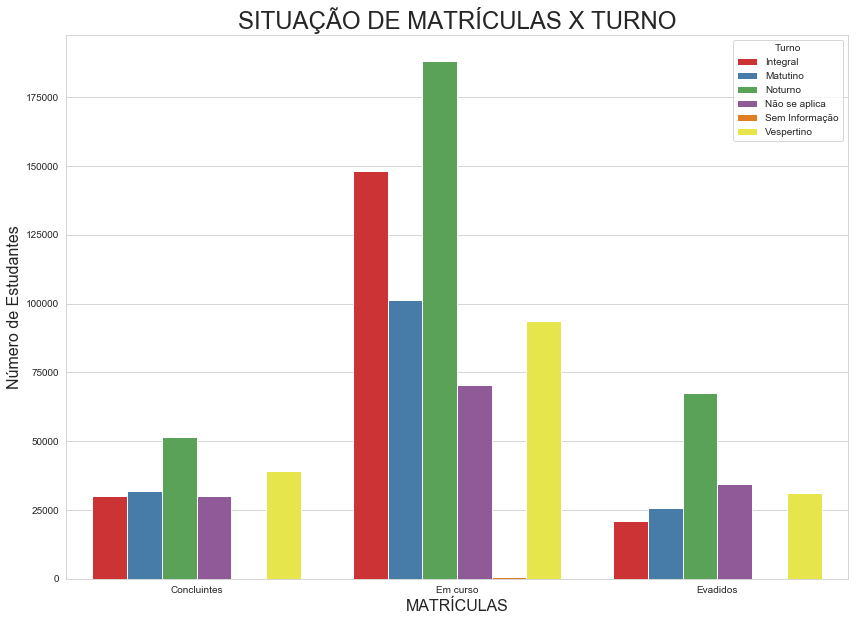

In [15]:
# Matrículas x Turno
plt.figure(figsize=(14,10))
sns.countplot(x='Cat_sit_mat',hue="Turno",data=pnp_drop, palette='Set1')
plt.title('SITUAÇÃO DE MATRÍCULAS X TURNO',fontsize=24)
plt.xlabel('MATRÍCULAS', fontsize=16)
plt.ylabel('Número de Estudantes', fontsize=16);

##### 4.1.2 Situação das Matrículas por Cor/Raça:

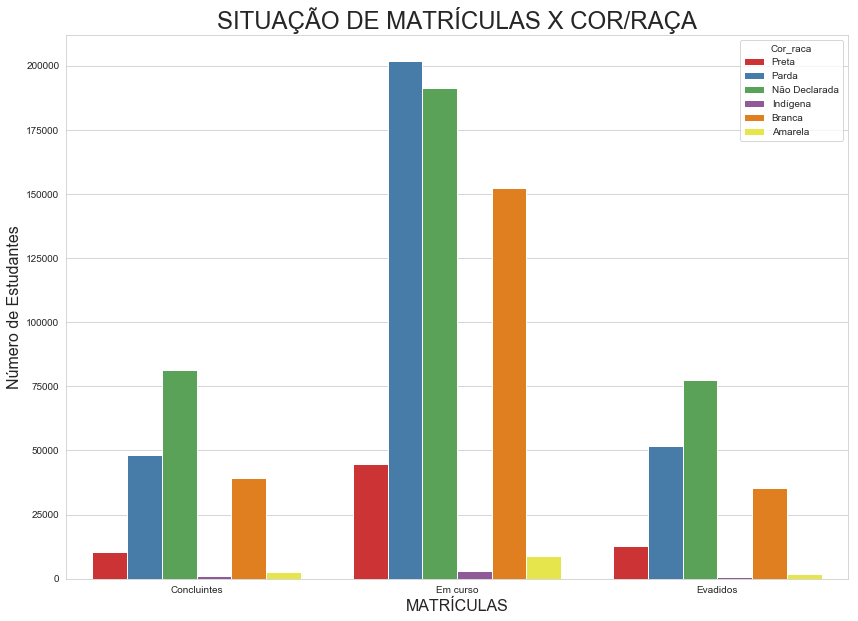

In [16]:
# Matrículas x Cor/Raça
plt.figure(figsize=(14,10))
sns.countplot(x='Cat_sit_mat',hue="Cor_raca",data=pnp_drop, palette='Set1')
plt.title('SITUAÇÃO DE MATRÍCULAS X COR/RAÇA',fontsize=24)
plt.xlabel('MATRÍCULAS', fontsize=16)
plt.ylabel('Número de Estudantes', fontsize=16);

##### 4.1.3 Situação das Matrículas por Faixa de Renda:

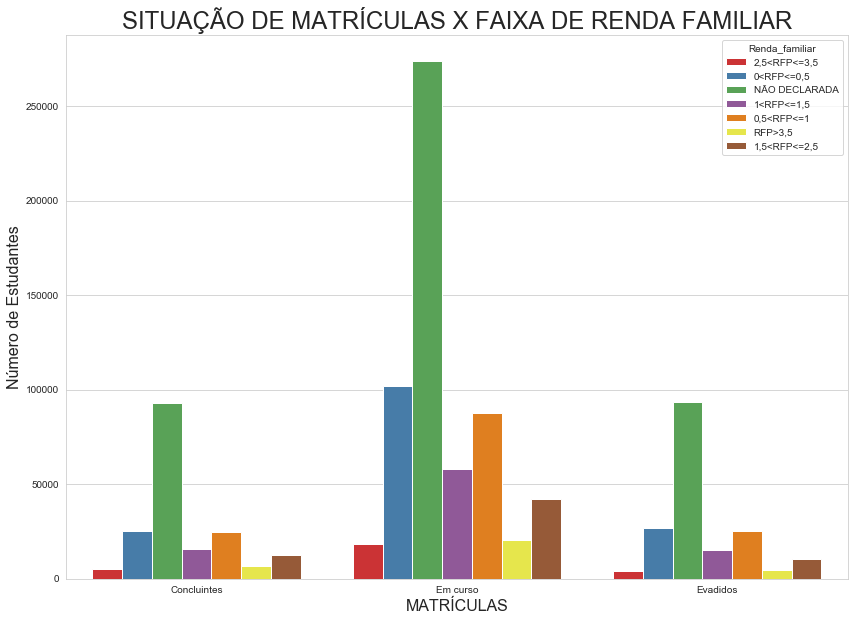

In [17]:
# Matrículas x Faixa de Renda Familiar
plt.figure(figsize=(14,10))
sns.countplot(x='Cat_sit_mat',hue="Renda_familiar",data=pnp_drop, palette='Set1')
plt.title('SITUAÇÃO DE MATRÍCULAS X FAIXA DE RENDA FAMILIAR',fontsize=24)
plt.xlabel('MATRÍCULAS', fontsize=16)
plt.ylabel('Número de Estudantes', fontsize=16);

##### 4.1.4 Situação das Matrículas por Faixa Etária:

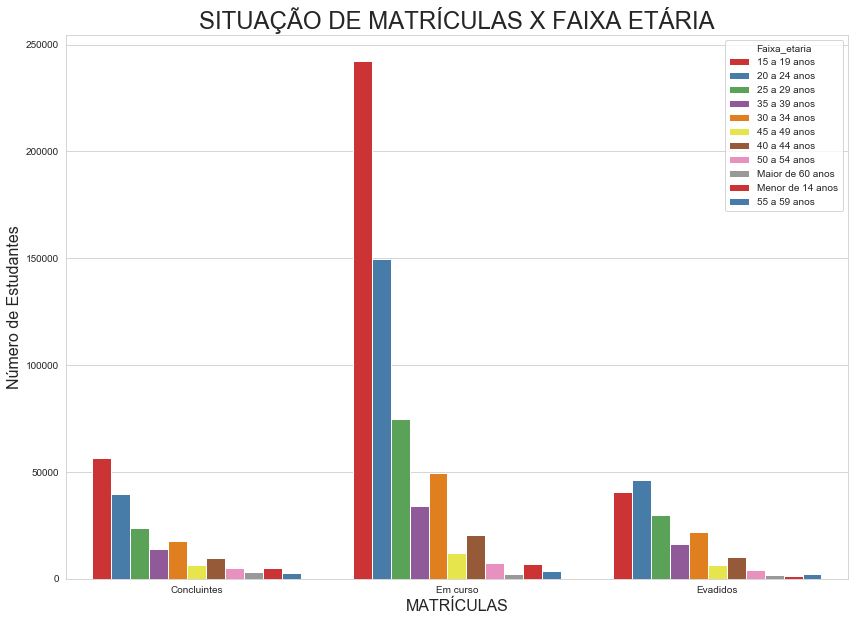

In [18]:
# Matrículas x Faixa Etária
plt.figure(figsize=(14,10))
sns.countplot(x='Cat_sit_mat',hue="Faixa_etaria",data=pnp_drop, palette='Set1')
plt.title('SITUAÇÃO DE MATRÍCULAS X FAIXA ETÁRIA',fontsize=24)
plt.xlabel('MATRÍCULAS', fontsize=16)
plt.ylabel('Número de Estudantes', fontsize=16);

In [19]:
#Matrículas por Turno
pnp_drop['Turno'].value_counts()

Noturno           307130
Integral          199101
Vespertino        163835
Matutino          158884
Não se aplica     134897
Sem Informação       746
Name: Turno, dtype: int64

In [20]:
#Removendo Sem Informação
pnp_drop = pnp_drop[pnp_drop.Turno !='Sem Informação']

In [21]:
pnp_drop['Turno'].value_counts()

Noturno          307130
Integral         199101
Vespertino       163835
Matutino         158884
Não se aplica    134897
Name: Turno, dtype: int64

In [22]:
pnp_drop['Tipo_curso'].value_counts()

Técnico                            500516
Qualificação Profissional (FIC)    135872
Bacharelado                         96442
Licenciatura                        89753
Tecnologia                          85035
Especialização (Lato Sensu)         34530
Ensino Médio                         6440
Ensino Fundamental II                4694
Mestrado Profissional                4030
Ensino Fundamental I                 3514
Mestrado                             2425
Doutorado                             350
Educação Infantil                     246
Name: Tipo_curso, dtype: int64

In [23]:
#Removendo alguns cursos
pnp_drop = pnp_drop[pnp_drop.Tipo_curso !='Educação Infantil']
pnp_drop = pnp_drop[pnp_drop.Tipo_curso !='Ensino Fundamental I']
pnp_drop = pnp_drop[pnp_drop.Tipo_curso !='Ensino Fundamental II']
pnp_drop = pnp_drop[pnp_drop.Tipo_curso !='Ensino Médio']

In [24]:
pnp_drop['Tipo_curso'].value_counts()

Técnico                            500516
Qualificação Profissional (FIC)    135872
Bacharelado                         96442
Licenciatura                        89753
Tecnologia                          85035
Especialização (Lato Sensu)         34530
Mestrado Profissional                4030
Mestrado                             2425
Doutorado                             350
Name: Tipo_curso, dtype: int64

In [25]:
#Removendo colunas
pnp_drop.drop(['Financiamento','Sit_matr' ], axis=1, inplace=True)

In [26]:
pnp_drop['Nome_curso'].nunique()

571

# * 571 Cursos cadastrados na PNP *

In [27]:
#Unificando Colunas de tipo de oferta com tipo de curso para nova coluna: Curso
pnp_drop['Curso'] = pnp_drop['Tipo_curso']
pnp_drop.loc[((pnp_drop.Tipo_curso=='Técnico') | (pnp_drop.Tipo_curso=='Qualificação Profissional (FIC)')) & (pnp_drop.Tipo_oferta=='Integrado') & (pnp_drop.CH >=800), 'Curso'] = 'Técnico Integrado' 
pnp_drop.loc[((pnp_drop.Tipo_curso=='Técnico') | (pnp_drop.Tipo_curso=='Qualificação Profissional (FIC)')) & (pnp_drop.Tipo_oferta=='Concomitante') & (pnp_drop.CH >=800), 'Curso']  = 'Técnico Concomitante'
pnp_drop.loc[((pnp_drop.Tipo_curso=='Técnico') | (pnp_drop.Tipo_curso=='Qualificação Profissional (FIC)')) & (pnp_drop.Tipo_oferta=='Subsequente') & (pnp_drop.CH >=800), 'Curso'] = 'Técnico Subsequente'
pnp_drop.loc[((pnp_drop.Tipo_curso=='Técnico') | (pnp_drop.Tipo_curso=='Qualificação Profissional (FIC)')) & (pnp_drop.Tipo_oferta=='PROEJA - Concomitante') & (pnp_drop.CH >=800), 'Curso'] = 'PROEJA - Concomitante'
pnp_drop.loc[((pnp_drop.Tipo_curso=='Técnico') | (pnp_drop.Tipo_curso=='Qualificação Profissional (FIC)')) & (pnp_drop.Tipo_oferta=='PROEJA - Integrado') & (pnp_drop.CH >=800), 'Curso'] = 'PROEJA - Integrado'
pnp_drop.head()

,Sexo,Renda_familiar,Cor_raca,Idade,Faixa_etaria,Cat_sit_mat,Turno,Inicio_ciclo,Fim_ciclo,Inscritos,CH,Eixo,Modalidade,Tipo_curso,Tipo_oferta,Nome_curso,Fator_esforco,Unidade,Instituicao,Curso
0,F,"2,5<RFP<=3,5",Preta,17.0,15 a 19 anos,Concluintes,Integral,15/02/2016,15/12/2018,145,3266,Informação e Comunicação,Educação Presencial,Técnico,Integrado,Técnico em Informática para Internet,"1,25",Campus Teófilo Otoni,IFNMG,Técnico Integrado
1,F,"0<RFP<=0,5",Preta,17.0,15 a 19 anos,Concluintes,Integral,15/02/2016,15/12/2018,145,3266,Informação e Comunicação,Educação Presencial,Técnico,Integrado,Técnico em Informática para Internet,"1,25",Campus Teófilo Otoni,IFNMG,Técnico Integrado
2,M,NÃO DECLARADA,Preta,17.0,15 a 19 anos,Concluintes,Integral,10/02/2016,20/12/2018,79,4660,Infraestrutura,Educação Presencial,Técnico,Integrado,Técnico em Edificações,"1,3",Campus Votuporanga,IFSP,Técnico Integrado
3,F,"1<RFP<=1,5",Preta,17.0,15 a 19 anos,Concluintes,Integral,10/02/2016,20/12/2018,79,4660,Infraestrutura,Educação Presencial,Técnico,Integrado,Técnico em Edificações,"1,3",Campus Votuporanga,IFSP,Técnico Integrado
4,F,"0<RFP<=0,5",Preta,18.0,15 a 19 anos,Concluintes,Integral,07/03/2016,20/12/2018,70,4330,Recursos Naturais,Educação Presencial,Técnico,Integrado,Técnico em Agropecuária,"1,2",Campus São João Evangelista,IFMG,Técnico Integrado


In [28]:
pnp_drop['Curso'].unique()

array(['Técnico Integrado', 'Técnico Subsequente', 'Tecnologia',
       'Mestrado Profissional', 'Licenciatura', 'Bacharelado',
       'Especialização (Lato Sensu)', 'Qualificação Profissional (FIC)',
       'Mestrado', 'Doutorado', 'PROEJA - Integrado',
       'Técnico Concomitante', 'PROEJA - Concomitante', 'Técnico'],
      dtype=object)

In [29]:
pnp_drop['Curso'].value_counts()

Técnico Integrado                  237208
Técnico Subsequente                187067
Qualificação Profissional (FIC)    133871
Bacharelado                         96442
Licenciatura                        89753
Tecnologia                          85035
Técnico Concomitante                60773
Especialização (Lato Sensu)         34530
PROEJA - Integrado                  16855
Mestrado Profissional                4030
Mestrado                             2425
PROEJA - Concomitante                 613
Doutorado                             350
Técnico                                 1
Name: Curso, dtype: int64

In [30]:
#Removendo técnico
pnp_drop=pnp_drop[pnp_drop.Curso != 'Técnico']
pnp_drop['Curso'].value_counts()

Técnico Integrado                  237208
Técnico Subsequente                187067
Qualificação Profissional (FIC)    133871
Bacharelado                         96442
Licenciatura                        89753
Tecnologia                          85035
Técnico Concomitante                60773
Especialização (Lato Sensu)         34530
PROEJA - Integrado                  16855
Mestrado Profissional                4030
Mestrado                             2425
PROEJA - Concomitante                 613
Doutorado                             350
Name: Curso, dtype: int64

In [31]:
pnp_drop.head(3)

,Sexo,Renda_familiar,Cor_raca,Idade,Faixa_etaria,Cat_sit_mat,Turno,Inicio_ciclo,Fim_ciclo,Inscritos,CH,Eixo,Modalidade,Tipo_curso,Tipo_oferta,Nome_curso,Fator_esforco,Unidade,Instituicao,Curso
0,F,"2,5<RFP<=3,5",Preta,17.0,15 a 19 anos,Concluintes,Integral,15/02/2016,15/12/2018,145,3266,Informação e Comunicação,Educação Presencial,Técnico,Integrado,Técnico em Informática para Internet,"1,25",Campus Teófilo Otoni,IFNMG,Técnico Integrado
1,F,"0<RFP<=0,5",Preta,17.0,15 a 19 anos,Concluintes,Integral,15/02/2016,15/12/2018,145,3266,Informação e Comunicação,Educação Presencial,Técnico,Integrado,Técnico em Informática para Internet,"1,25",Campus Teófilo Otoni,IFNMG,Técnico Integrado
2,M,NÃO DECLARADA,Preta,17.0,15 a 19 anos,Concluintes,Integral,10/02/2016,20/12/2018,79,4660,Infraestrutura,Educação Presencial,Técnico,Integrado,Técnico em Edificações,"1,3",Campus Votuporanga,IFSP,Técnico Integrado


In [32]:
#Convertendo data em datime
pnp_drop['Inicio_ciclo']=pd.to_datetime(pnp_drop['Inicio_ciclo'])
pnp_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948952 entries, 0 to 964592
Data columns (total 20 columns):
Sexo              948952 non-null object
Renda_familiar    948952 non-null object
Cor_raca          948952 non-null object
Idade             948952 non-null float64
Faixa_etaria      948952 non-null object
Cat_sit_mat       948952 non-null object
Turno             948952 non-null object
Inicio_ciclo      948952 non-null datetime64[ns]
Fim_ciclo         948952 non-null object
Inscritos         948952 non-null int64
CH                948952 non-null int64
Eixo              948952 non-null object
Modalidade        948952 non-null object
Tipo_curso        948952 non-null object
Tipo_oferta       948952 non-null object
Nome_curso        948952 non-null object
Fator_esforco     948952 non-null object
Unidade           948952 non-null object
Instituicao       948952 non-null object
Curso             948952 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(16)
me

In [33]:
#Matrículas por Faixa Etária
pnp_drop['Faixa_etaria'].value_counts()

15 a 19 anos        331458
20 a 24 anos        234227
25 a 29 anos        128166
30 a 34 anos         88591
35 a 39 anos         63976
40 a 44 anos         39715
45 a 49 anos         24836
50 a 54 anos         16034
55 a 59 anos          8472
Maior de 60 anos      6816
Menor de 14 anos      6661
Name: Faixa_etaria, dtype: int64

In [34]:
#Removendo Menor de 14 anos
pnp_drop=pnp_drop[pnp_drop.Faixa_etaria != 'Menor de 14 anos']
pnp_drop['Faixa_etaria'].value_counts()

15 a 19 anos        331458
20 a 24 anos        234227
25 a 29 anos        128166
30 a 34 anos         88591
35 a 39 anos         63976
40 a 44 anos         39715
45 a 49 anos         24836
50 a 54 anos         16034
55 a 59 anos          8472
Maior de 60 anos      6816
Name: Faixa_etaria, dtype: int64

In [35]:
#Fazendo uma cópia
pnp_drop_copy= pnp_drop.copy()

In [36]:
pnp_drop_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942291 entries, 0 to 964592
Data columns (total 20 columns):
Sexo              942291 non-null object
Renda_familiar    942291 non-null object
Cor_raca          942291 non-null object
Idade             942291 non-null float64
Faixa_etaria      942291 non-null object
Cat_sit_mat       942291 non-null object
Turno             942291 non-null object
Inicio_ciclo      942291 non-null datetime64[ns]
Fim_ciclo         942291 non-null object
Inscritos         942291 non-null int64
CH                942291 non-null int64
Eixo              942291 non-null object
Modalidade        942291 non-null object
Tipo_curso        942291 non-null object
Tipo_oferta       942291 non-null object
Nome_curso        942291 non-null object
Fator_esforco     942291 non-null object
Unidade           942291 non-null object
Instituicao       942291 non-null object
Curso             942291 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(16)
me

In [37]:
#Formatando para Inicio do curso - 1º ou 2º semestre
pnp_drop_copy['Mes_inicio'] = pd.DatetimeIndex(pnp_drop_copy['Inicio_ciclo']).month
pnp_drop_copy['Inicio_semestre']= 'nan'
pnp_drop_copy.loc[(pnp_drop_copy.Mes_inicio <=6),'Inicio_semestre']=1
pnp_drop_copy.loc[(pnp_drop_copy.Mes_inicio >6 ),'Inicio_semestre']=2
pnp_drop_copy.head()

,Sexo,Renda_familiar,Cor_raca,Idade,Faixa_etaria,Cat_sit_mat,Turno,Inicio_ciclo,Fim_ciclo,Inscritos,...,Modalidade,Tipo_curso,Tipo_oferta,Nome_curso,Fator_esforco,Unidade,Instituicao,Curso,Mes_inicio,Inicio_semestre
0,F,"2,5<RFP<=3,5",Preta,17.0,15 a 19 anos,Concluintes,Integral,2016-02-15,15/12/2018,145,...,Educação Presencial,Técnico,Integrado,Técnico em Informática para Internet,"1,25",Campus Teófilo Otoni,IFNMG,Técnico Integrado,2,1
1,F,"0<RFP<=0,5",Preta,17.0,15 a 19 anos,Concluintes,Integral,2016-02-15,15/12/2018,145,...,Educação Presencial,Técnico,Integrado,Técnico em Informática para Internet,"1,25",Campus Teófilo Otoni,IFNMG,Técnico Integrado,2,1
2,M,NÃO DECLARADA,Preta,17.0,15 a 19 anos,Concluintes,Integral,2016-10-02,20/12/2018,79,...,Educação Presencial,Técnico,Integrado,Técnico em Edificações,"1,3",Campus Votuporanga,IFSP,Técnico Integrado,10,2
3,F,"1<RFP<=1,5",Preta,17.0,15 a 19 anos,Concluintes,Integral,2016-10-02,20/12/2018,79,...,Educação Presencial,Técnico,Integrado,Técnico em Edificações,"1,3",Campus Votuporanga,IFSP,Técnico Integrado,10,2
4,F,"0<RFP<=0,5",Preta,18.0,15 a 19 anos,Concluintes,Integral,2016-07-03,20/12/2018,70,...,Educação Presencial,Técnico,Integrado,Técnico em Agropecuária,"1,2",Campus São João Evangelista,IFMG,Técnico Integrado,7,2


In [38]:
# Convertendo dados categóricos em valores inteiros de 0 a 12
label = LabelEncoder() 

pnp_drop_copy['Sex'] = label.fit_transform(pnp_drop_copy['Sexo'])
pnp_drop_copy['Renda'] = label.fit_transform(pnp_drop_copy['Renda_familiar'])
pnp_drop_copy['F_Etária'] = label.fit_transform(pnp_drop_copy['Faixa_etaria'])
pnp_drop_copy['Cor_Raça'] = label.fit_transform(pnp_drop_copy['Cor_raca'])
pnp_drop_copy['Período'] = label.fit_transform(pnp_drop_copy['Turno'])
pnp_drop_copy['Eixos'] = label.fit_transform(pnp_drop_copy['Eixo'])
pnp_drop_copy['Presencial_EAD'] = label.fit_transform(pnp_drop_copy['Modalidade'])
pnp_drop_copy['Tipo_Curso'] = label.fit_transform(pnp_drop_copy['Curso'])
pnp_drop_copy['Oferecimento'] = label.fit_transform(pnp_drop_copy['Inicio_semestre'])

In [39]:
#Removendo colunas
pnp_drop_copy.drop(['Inicio_ciclo','Mes_inicio','Fim_ciclo','Tipo_curso','Tipo_oferta','Inicio_semestre','Idade'], axis=1, inplace = True)

In [40]:
pnp_drop_copy.head(3)

,Sexo,Renda_familiar,Cor_raca,Faixa_etaria,Cat_sit_mat,Turno,Inscritos,CH,Eixo,Modalidade,...,Curso,Sex,Renda,F_Etária,Cor_Raça,Período,Eixos,Presencial_EAD,Tipo_Curso,Oferecimento
0,F,"2,5<RFP<=3,5",Preta,15 a 19 anos,Concluintes,Integral,145,3266,Informação e Comunicação,Educação Presencial,...,Técnico Integrado,0,4,0,5,0,4,0,11,0
1,F,"0<RFP<=0,5",Preta,15 a 19 anos,Concluintes,Integral,145,3266,Informação e Comunicação,Educação Presencial,...,Técnico Integrado,0,1,0,5,0,4,0,11,0
2,M,NÃO DECLARADA,Preta,15 a 19 anos,Concluintes,Integral,79,4660,Infraestrutura,Educação Presencial,...,Técnico Integrado,1,5,0,5,0,5,0,11,1


In [41]:
#Alunos por situação de matrícula
pnp_drop_copy['Cat_sit_mat'].value_counts()

Em curso       589787
Evadidos       177473
Concluintes    175031
Name: Cat_sit_mat, dtype: int64

# 589.787 Alunos em curso
# 175.031 Alunos Concluintes
# 177.473 Alunos Evadidos (30,09%)

In [42]:
#Criando coluna de evadidos (1 - evadido; 0 - Em curso)
pnp_drop_copy['Evadidos']= 'nan'
pnp_drop_copy.loc[(pnp_drop_copy.Cat_sit_mat=='Em curso') | (pnp_drop_copy.Cat_sit_mat=='Concluintes'), 'Evadidos'] = 0 
pnp_drop_copy.loc[(pnp_drop_copy.Cat_sit_mat=='Evadidos'), 'Evadidos'] = 1 
pnp_drop_copy['Evadidos'].value_counts()

0    764818
1    177473
Name: Evadidos, dtype: int64

# 764.818 Alunos em Curso + Concluinte

# 177.473 Alunos Evadidos (23,20%)

In [43]:
#Removendo coluna
pnp_drop_copy.drop(['Cat_sit_mat'], axis =1, inplace = True)

In [44]:
pnp_drop_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942291 entries, 0 to 964592
Data columns (total 24 columns):
Sexo              942291 non-null object
Renda_familiar    942291 non-null object
Cor_raca          942291 non-null object
Faixa_etaria      942291 non-null object
Turno             942291 non-null object
Inscritos         942291 non-null int64
CH                942291 non-null int64
Eixo              942291 non-null object
Modalidade        942291 non-null object
Nome_curso        942291 non-null object
Fator_esforco     942291 non-null object
Unidade           942291 non-null object
Instituicao       942291 non-null object
Curso             942291 non-null object
Sex               942291 non-null int64
Renda             942291 non-null int64
F_Etária          942291 non-null int64
Cor_Raça          942291 non-null int64
Período           942291 non-null int64
Eixos             942291 non-null int64
Presencial_EAD    942291 non-null int64
Tipo_Curso        942291 non-null int

### 4.2 Heatmap - Correlação

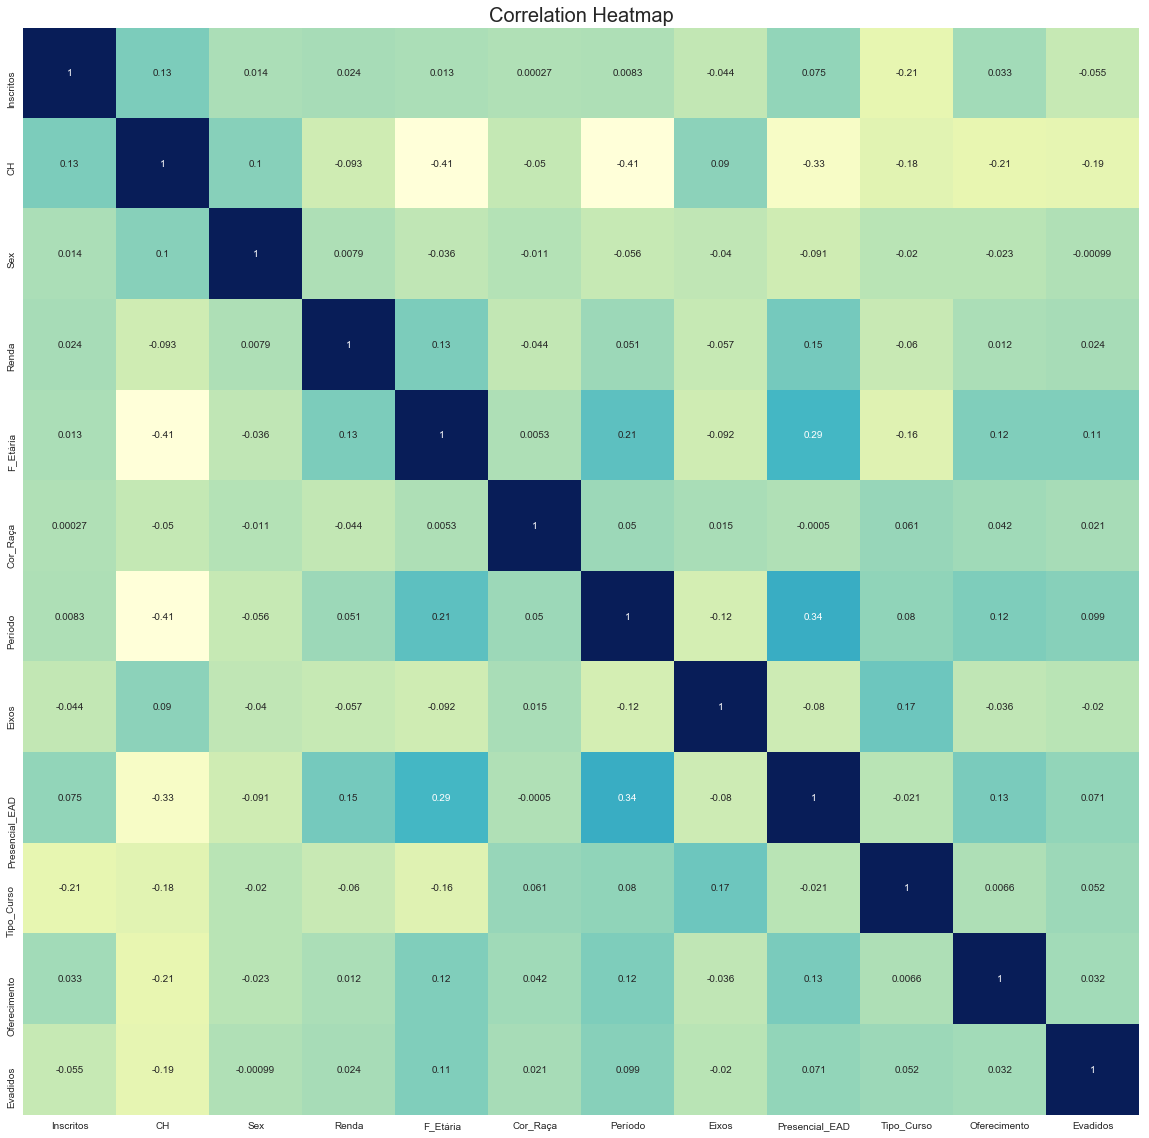

In [45]:
corr = pnp_drop_copy.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="YlGnBu", cbar=False)
plt.title('Correlation Heatmap', fontsize=20);

### 4.3 Evadidos por Faixa de Renda

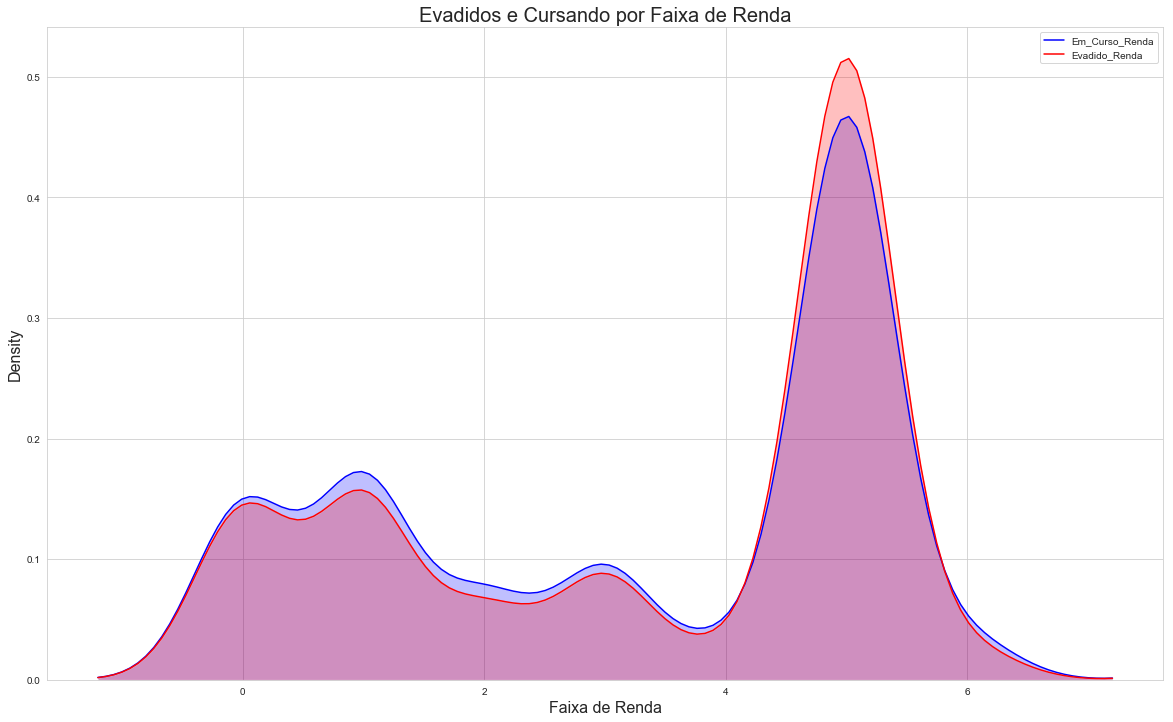

In [46]:
#Criando um dataframe evadidos por renda
evadido = pnp_drop_copy.loc[pnp_drop_copy.Evadidos == 1]
evadido['Evadido_Renda']=evadido.Renda
#Criando um dataframe em curso por renda
em_curso = pnp_drop_copy.loc[pnp_drop_copy.Evadidos == 0]
em_curso['Em_Curso_Renda']=em_curso.Renda
plt.figure(figsize=(20,12))
p1=sns.kdeplot(em_curso['Em_Curso_Renda'], shade=True, bw=0.4, color="b")
p1=sns.kdeplot(evadido['Evadido_Renda'], shade=True, bw=0.4, color="r")
plt.title('Evadidos e Cursando por Faixa de Renda', fontsize=20)
plt.ylabel('Density', fontsize=16)
plt.xlabel('Faixa de Renda', fontsize=16);

In [47]:
# evadidos status
perc = (lambda col: col/col.sum())
index = ['0','1']
renda_tab1 = pd.crosstab(index=pnp_drop_copy.Evadidos, columns=pnp_drop_copy.Renda)
renda_tab = np.log(renda_tab1)
renda_perc = renda_tab.apply(perc)

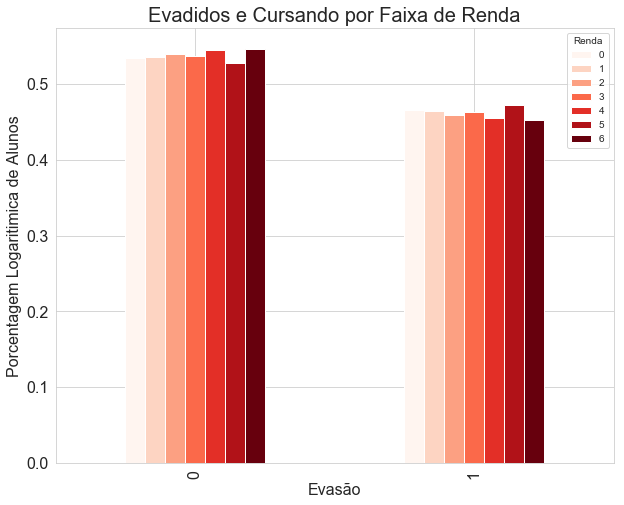

In [48]:
renda_perc.plot.bar(colormap="Reds", figsize=(10,8), fontsize=16)
plt.title('Evadidos e Cursando por Faixa de Renda', fontsize=20)
plt.ylabel('Porcentagem Logaritimica de Alunos', fontsize=16)
plt.xlabel('Evasão', fontsize=16);

### 4.4 Evadidos por Faixa Etária

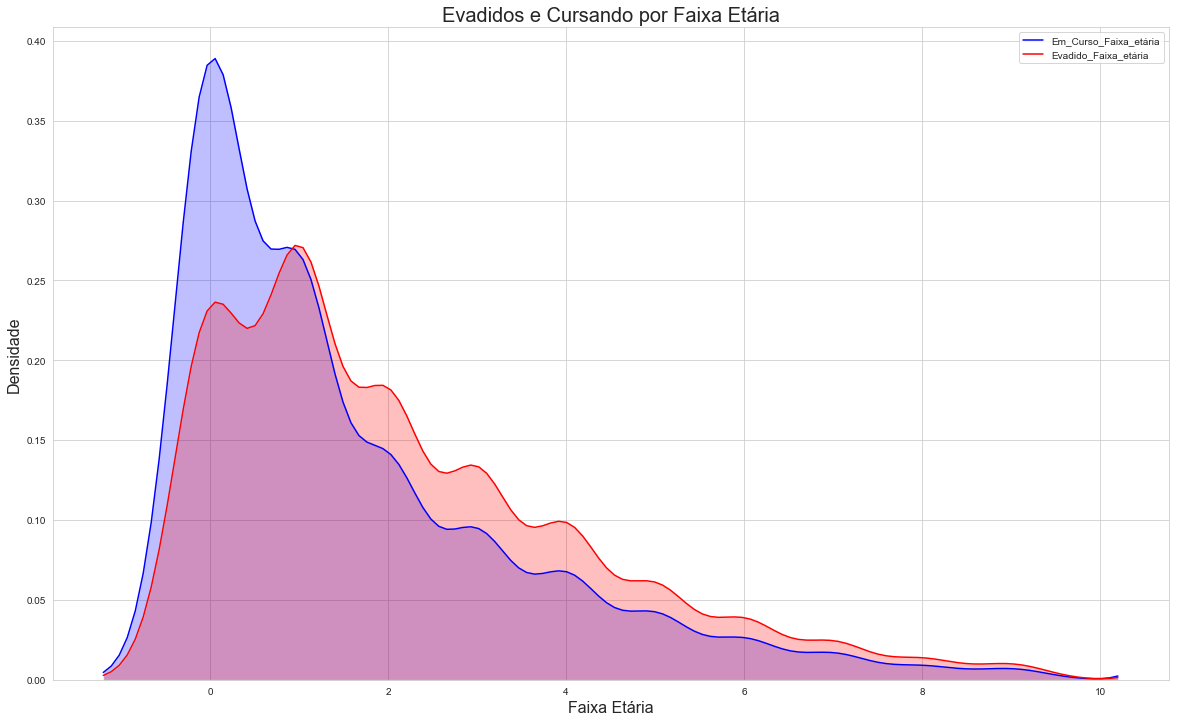

In [49]:
#Criando um dataframe evadidos por faixa etária
evadido = pnp_drop_copy.loc[pnp_drop_copy.Evadidos == 1]
evadido['Evadido_Faixa_etária']=evadido.F_Etária
#Criando um dataframe em curso por renda
em_curso = pnp_drop_copy.loc[pnp_drop_copy.Evadidos == 0]
em_curso['Em_Curso_Faixa_etária']=em_curso.F_Etária
plt.figure(figsize=(20,12))
p1=sns.kdeplot(em_curso['Em_Curso_Faixa_etária'], shade=True, bw = 0.4,color="b")
p1=sns.kdeplot(evadido['Evadido_Faixa_etária'], shade=True, bw = 0.4,color="r")
plt.title('Evadidos e Cursando por Faixa Etária', fontsize=20)
plt.ylabel('Densidade', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=16);

### 4.5 Evadidos por Turno

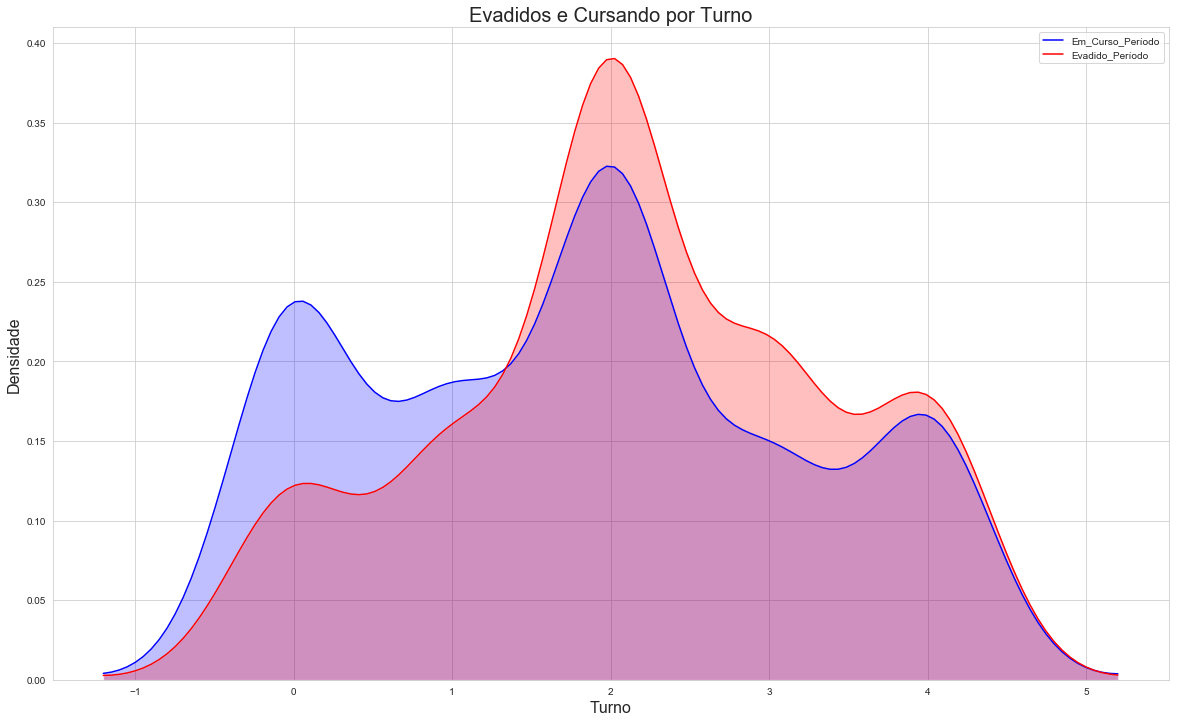

In [50]:
evadido = pnp_drop_copy.loc[pnp_drop_copy.Evadidos == 1]
evadido['Evadido_Período']=evadido.Período
#Criando um dataframe em curso por renda
em_curso = pnp_drop_copy.loc[pnp_drop_copy.Evadidos == 0]
em_curso['Em_Curso_Período']=em_curso.Período
plt.figure(figsize=(20,12))
p1=sns.kdeplot(em_curso['Em_Curso_Período'], shade=True,bw = 0.4, color="b")
p1=sns.kdeplot(evadido['Evadido_Período'], shade=True, bw = 0.4,color="r")
plt.title('Evadidos e Cursando por Turno', fontsize=20)
plt.ylabel('Densidade', fontsize=16)
plt.xlabel('Turno', fontsize=16);

### 4.6 Evadidos por Tipo de Curso

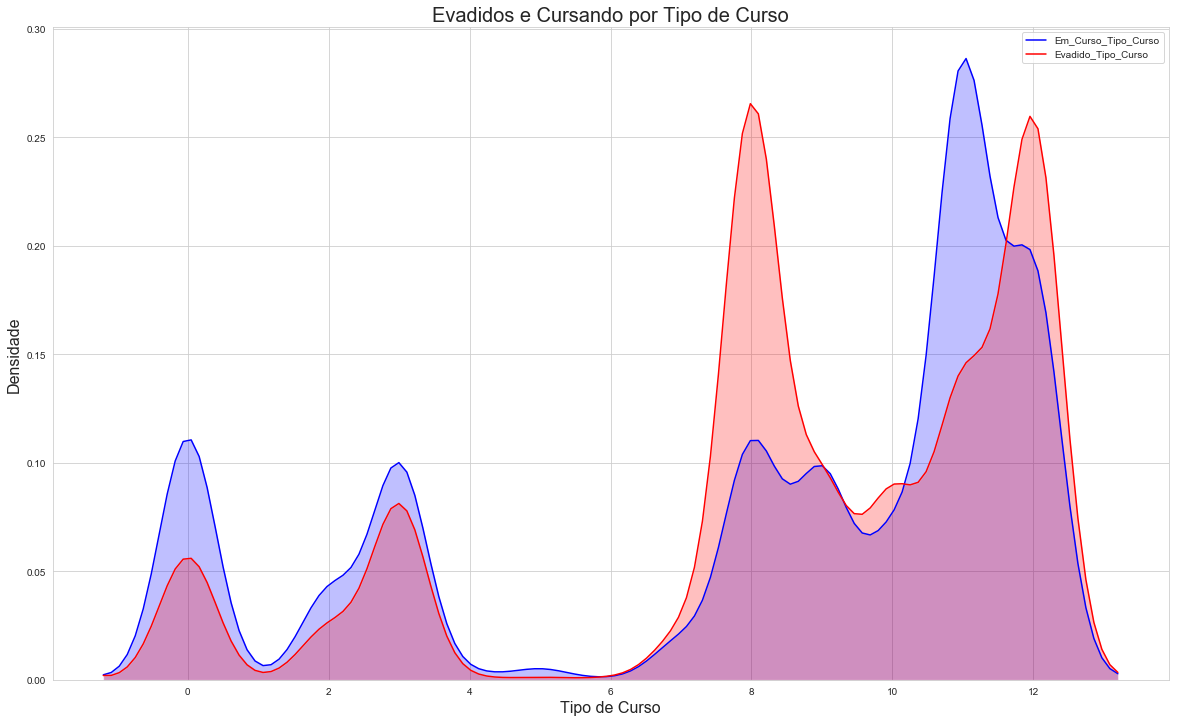

In [51]:
evadido = pnp_drop_copy.loc[pnp_drop_copy.Evadidos == 1]
evadido['Evadido_Tipo_Curso']=evadido.Tipo_Curso
#Criando um dataframe em curso por renda
em_curso = pnp_drop_copy.loc[pnp_drop_copy.Evadidos == 0]
em_curso['Em_Curso_Tipo_Curso']=em_curso.Tipo_Curso
plt.figure(figsize=(20,12))
p1=sns.kdeplot(em_curso['Em_Curso_Tipo_Curso'], shade=True,bw = 0.4, color="b")
p1=sns.kdeplot(evadido['Evadido_Tipo_Curso'], shade=True, bw = 0.4,color="r")
plt.title('Evadidos e Cursando por Tipo de Curso', fontsize=20)
plt.ylabel('Densidade', fontsize=16)
plt.xlabel('Tipo de Curso', fontsize=16);

### 4.7 Evadidos por Semestre de Oferecimento

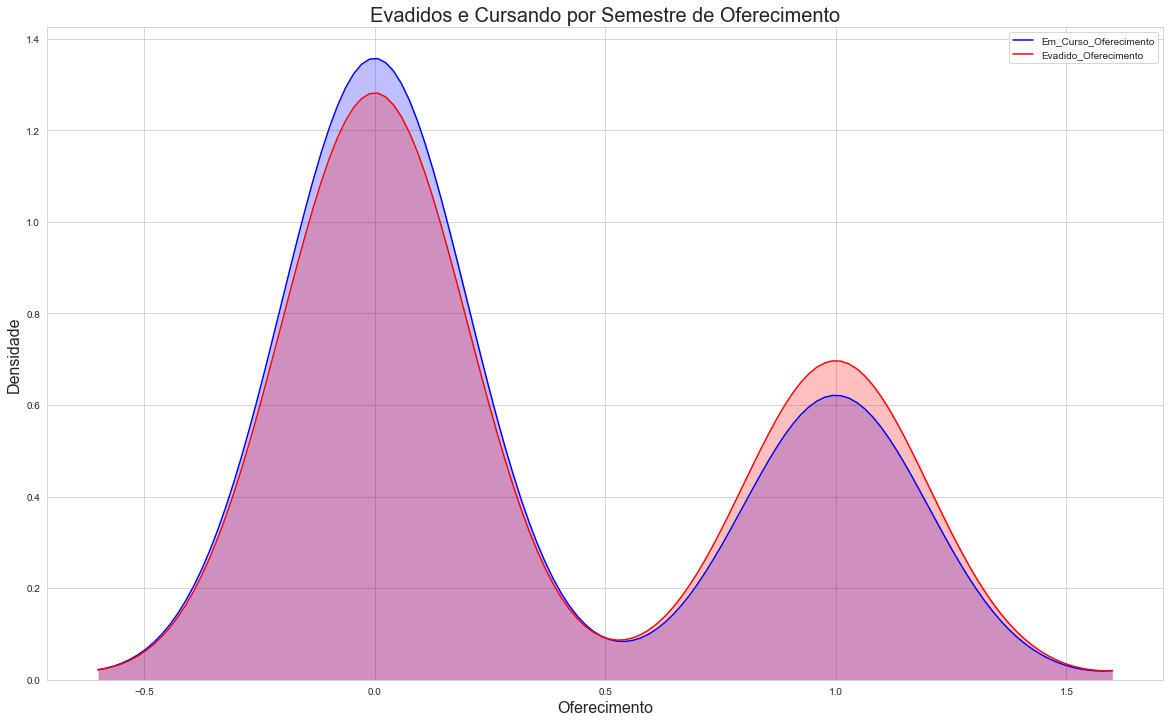

In [52]:
evadido = pnp_drop_copy.loc[pnp_drop_copy.Evadidos == 1]
evadido['Evadido_Oferecimento']=evadido.Oferecimento
#Criando um dataframe em curso por renda
em_curso = pnp_drop_copy.loc[pnp_drop_copy.Evadidos == 0]
em_curso['Em_Curso_Oferecimento']=em_curso.Oferecimento
plt.figure(figsize=(20,12))
p1=sns.kdeplot(em_curso['Em_Curso_Oferecimento'], shade=True, bw = 0.2, color="b")
p1=sns.kdeplot(evadido['Evadido_Oferecimento'], shade=True, bw = 0.2, color="r")
plt.title('Evadidos e Cursando por Semestre de Oferecimento', fontsize=20)
plt.ylabel('Densidade', fontsize=16)
plt.xlabel('Oferecimento', fontsize=16);

### 4.8 Evadidos por Cor/Raça

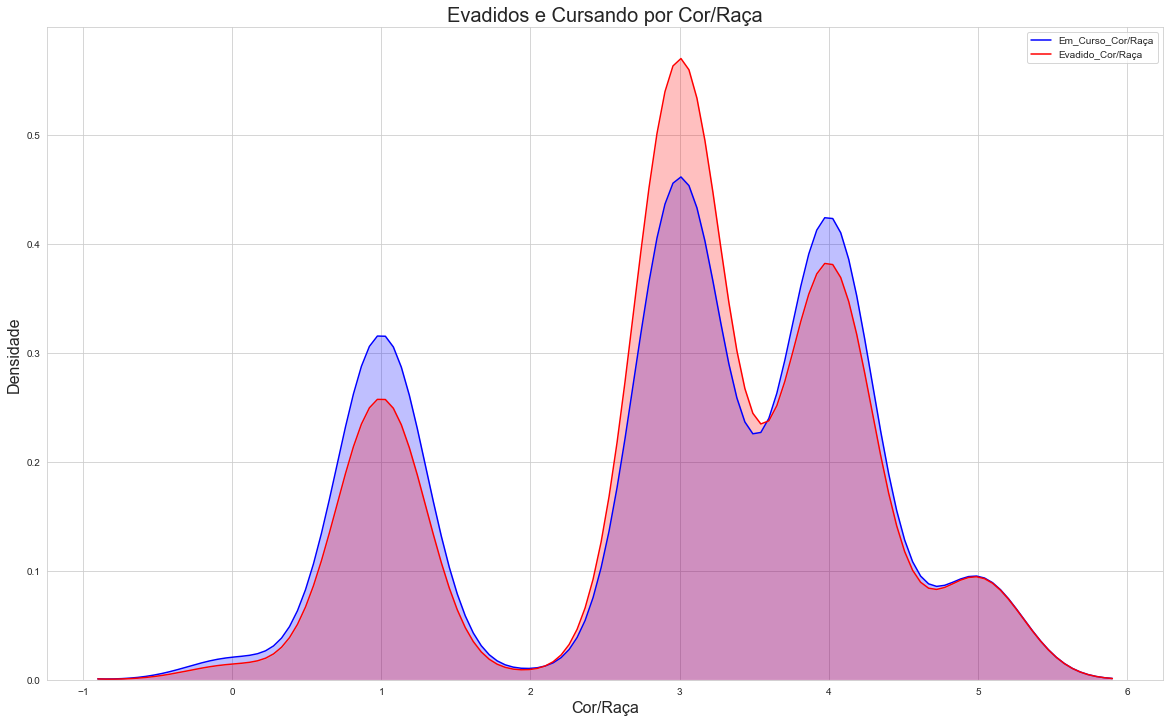

In [53]:
evadido = pnp_drop_copy.loc[pnp_drop_copy.Evadidos == 1]
evadido['Evadido_Cor/Raça']=evadido.Cor_Raça
#Criando um dataframe em curso por renda
em_curso = pnp_drop_copy.loc[pnp_drop_copy.Evadidos == 0]
em_curso['Em_Curso_Cor/Raça']=em_curso.Cor_Raça
plt.figure(figsize=(20,12))
p1=sns.kdeplot(em_curso['Em_Curso_Cor/Raça'], shade=True, bw = 0.3, color="b")
p1=sns.kdeplot(evadido['Evadido_Cor/Raça'], shade=True, bw = 0.3, color="r")
plt.title('Evadidos e Cursando por Cor/Raça', fontsize=20)
plt.ylabel('Densidade', fontsize=16)
plt.xlabel('Cor/Raça', fontsize=16);

### 4.9 Evadidos por Eixo

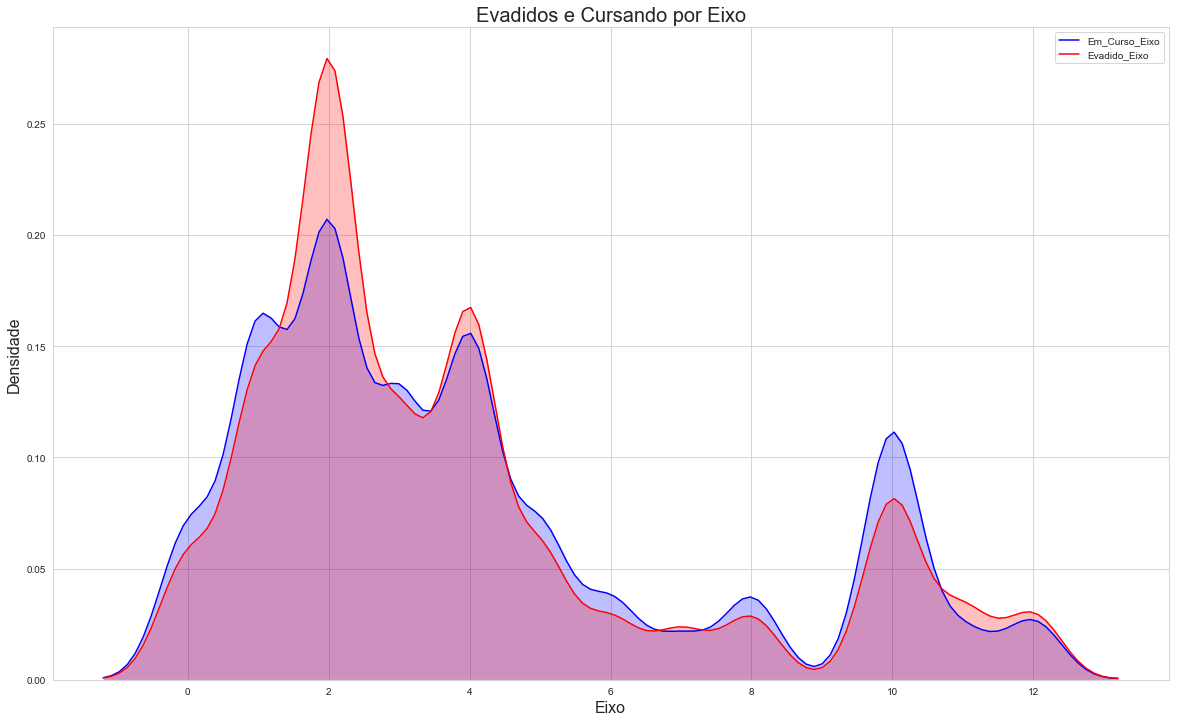

In [54]:
evadido = pnp_drop_copy.loc[pnp_drop_copy.Evadidos == 1]
evadido['Evadido_Eixo']=evadido.Eixos
#Criando um dataframe em curso por renda
em_curso = pnp_drop_copy.loc[pnp_drop_copy.Evadidos == 0]
em_curso['Em_Curso_Eixo']=em_curso.Eixos
plt.figure(figsize=(20,12))
p1=sns.kdeplot(em_curso['Em_Curso_Eixo'], shade=True, bw = 0.4, color="b")
p1=sns.kdeplot(evadido['Evadido_Eixo'], shade=True, bw = 0.4, color="r")
plt.title('Evadidos e Cursando por Eixo', fontsize=20)
plt.ylabel('Densidade', fontsize=16)
plt.xlabel('Eixo', fontsize=16);

### 4.10 Histogramas - Evadidos

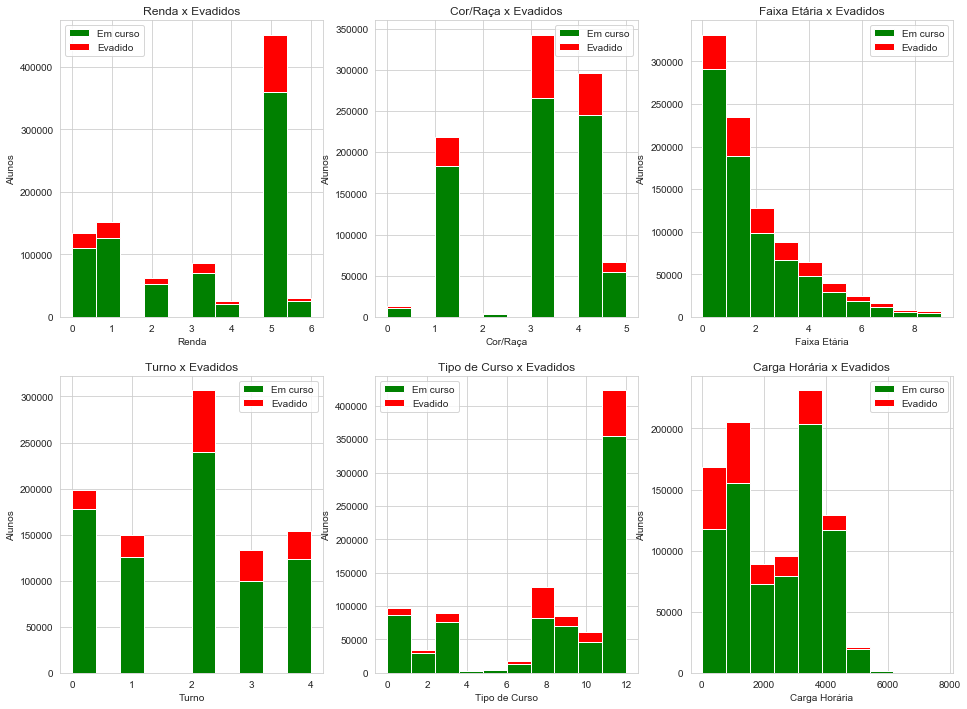

In [55]:
plt.figure(figsize=[16,12])
plt.subplot(231)
plt.hist(x = [pnp_drop_copy[pnp_drop_copy['Evadidos']==0]['Renda'], pnp_drop_copy[pnp_drop_copy['Evadidos']==1]['Renda']], 
         stacked=True, color = ['g','r'],label = ['Em curso','Evadido'])
plt.title('Renda x Evadidos')
plt.xlabel('Renda')
plt.ylabel('Alunos')
plt.legend();


plt.subplot(232)
plt.hist(x = [pnp_drop_copy[pnp_drop_copy['Evadidos']==0]['Cor_Raça'], pnp_drop_copy[pnp_drop_copy['Evadidos']==1]['Cor_Raça']], 
         stacked=True, color = ['g','r'],label = ['Em curso','Evadido'])
plt.title('Cor/Raça x Evadidos')
plt.xlabel('Cor/Raça')
plt.ylabel('Alunos')
plt.legend();


plt.subplot(233)
plt.hist(x = [pnp_drop_copy[pnp_drop_copy['Evadidos']==0]['F_Etária'], pnp_drop_copy[pnp_drop_copy['Evadidos']==1]['F_Etária']], 
         stacked=True, color = ['g','r'],label = ['Em curso','Evadido'])
plt.title('Faixa Etária x Evadidos')
plt.xlabel('Faixa Etária')
plt.ylabel('Alunos')
plt.legend();


plt.subplot(234)
plt.hist(x = [pnp_drop_copy[pnp_drop_copy['Evadidos']==0]['Período'], pnp_drop_copy[pnp_drop_copy['Evadidos']==1]['Período']], 
         stacked=True, color = ['g','r'],label = ['Em curso','Evadido'])
plt.title('Turno x Evadidos')
plt.xlabel('Turno')
plt.ylabel('Alunos')
plt.legend();


plt.subplot(235)
plt.hist(x = [pnp_drop_copy[pnp_drop_copy['Evadidos']==0]['Tipo_Curso'], pnp_drop_copy[pnp_drop_copy['Evadidos']==1]['Tipo_Curso']], 
         stacked=True, color = ['g','r'],label = ['Em curso','Evadido'])
plt.title('Tipo de Curso x Evadidos')
plt.xlabel('Tipo de Curso')
plt.ylabel('Alunos')
plt.legend();


plt.subplot(236)
plt.hist(x = [pnp_drop_copy[pnp_drop_copy['Evadidos']==0]['CH'], pnp_drop_copy[pnp_drop_copy['Evadidos']==1]['CH']], 
         stacked=True, color = ['g','r'],label = ['Em curso','Evadido'])
plt.title('Carga Horária x Evadidos')
plt.xlabel('Carga Horária')
plt.ylabel('Alunos')
plt.legend();



### 4.11 Curso x Modalidade - Comparação de Evadidos

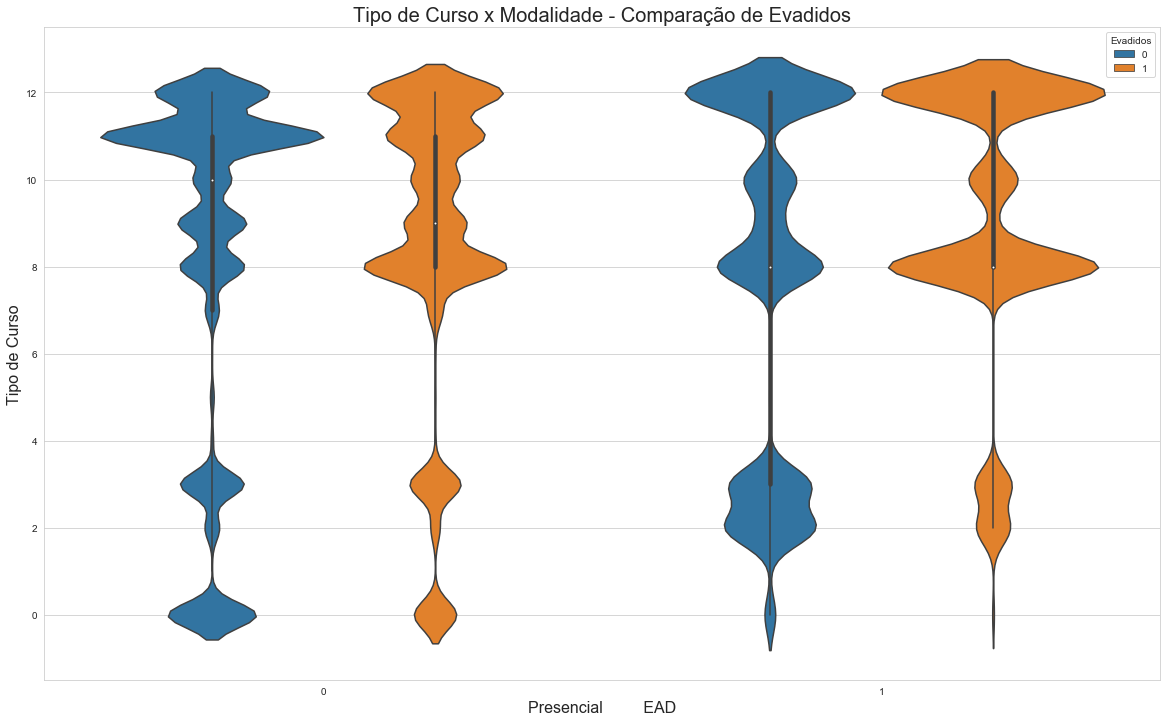

In [56]:
plt.figure(figsize=(20,12))

sns.violinplot(x = 'Presencial_EAD', y = 'Tipo_Curso', hue = 'Evadidos',data = pnp_drop_copy, ylim=(1,6))
plt.title('Tipo de Curso x Modalidade - Comparação de Evadidos', fontsize=20)
plt.ylabel('Tipo de Curso', fontsize=16)
plt.xlabel('Presencial         EAD', fontsize=16);

### 4.12 Curso x Turno - Comparação de Evadidos

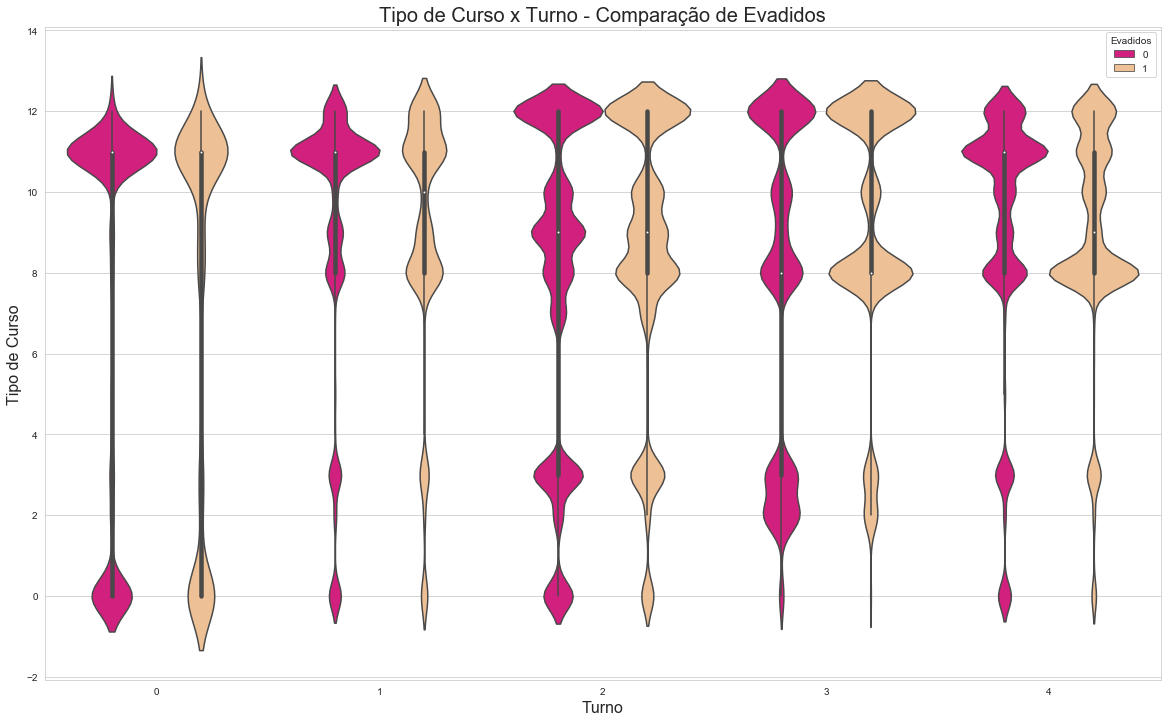

In [57]:
plt.figure(figsize=(20,12))

sns.violinplot(x = 'Período', y = 'Tipo_Curso', hue = 'Evadidos',palette="Accent_r",data = pnp_drop_copy, ylim=(1,6))
plt.title('Tipo de Curso x Turno - Comparação de Evadidos', fontsize=20)
plt.ylabel('Tipo de Curso', fontsize=16)
plt.xlabel('Turno', fontsize=16);

### 4.13 Curso x Carga Horária - Comparação de Evadidos

In [58]:
#Dividindo a carga horária em 6 partes
pnp_drop_copy['CH'] = pd.qcut(pnp_drop_copy['CH'], 6)

In [59]:
pnp_drop_copy.head(3)

,Sexo,Renda_familiar,Cor_raca,Faixa_etaria,Turno,Inscritos,CH,Eixo,Modalidade,Nome_curso,...,Sex,Renda,F_Etária,Cor_Raça,Período,Eixos,Presencial_EAD,Tipo_Curso,Oferecimento,Evadidos
0,F,"2,5<RFP<=3,5",Preta,15 a 19 anos,Integral,145,"(2400.0, 3340.0]",Informação e Comunicação,Educação Presencial,Técnico em Informática para Internet,...,0,4,0,5,0,4,0,11,0,0
1,F,"0<RFP<=0,5",Preta,15 a 19 anos,Integral,145,"(2400.0, 3340.0]",Informação e Comunicação,Educação Presencial,Técnico em Informática para Internet,...,0,1,0,5,0,4,0,11,0,0
2,M,NÃO DECLARADA,Preta,15 a 19 anos,Integral,79,"(3855.0, 7725.0]",Infraestrutura,Educação Presencial,Técnico em Edificações,...,1,5,0,5,0,5,0,11,1,0


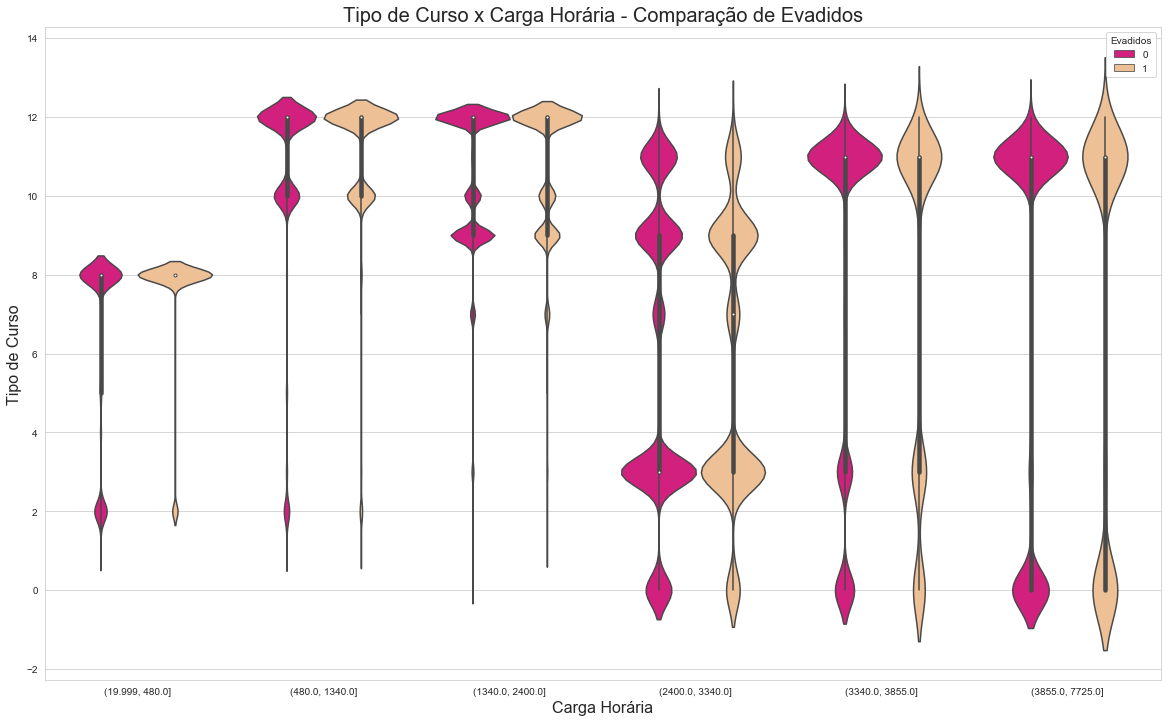

In [60]:
plt.figure(figsize=(20,12))

sns.violinplot(x = 'CH', y = 'Tipo_Curso', hue = 'Evadidos',palette="Accent_r",data = pnp_drop_copy, ylim=(1,6))
plt.title('Tipo de Curso x Carga Horária - Comparação de Evadidos', fontsize=20)
plt.ylabel('Tipo de Curso', fontsize=16)
plt.xlabel('Carga Horária', fontsize=16);

## 5. Classificação
### Uso dos dados da PNP para prever a evasão

### 5.1 Preparação do dataset para modelagem

In [61]:
label = LabelEncoder() # Converte dados categóricos em valores inteiros de 0 a 6
pnp_drop_copy['Curso'] = label.fit_transform(pnp_drop_copy['Nome_curso'])
pnp_drop_copy['Carga_horaria'] = label.fit_transform(pnp_drop_copy['CH'])


In [62]:
pnp_drop_copy.head(3)

,Sexo,Renda_familiar,Cor_raca,Faixa_etaria,Turno,Inscritos,CH,Eixo,Modalidade,Nome_curso,...,Renda,F_Etária,Cor_Raça,Período,Eixos,Presencial_EAD,Tipo_Curso,Oferecimento,Evadidos,Carga_horaria
0,F,"2,5<RFP<=3,5",Preta,15 a 19 anos,Integral,145,"(2400.0, 3340.0]",Informação e Comunicação,Educação Presencial,Técnico em Informática para Internet,...,4,0,5,0,4,0,11,0,0,3
1,F,"0<RFP<=0,5",Preta,15 a 19 anos,Integral,145,"(2400.0, 3340.0]",Informação e Comunicação,Educação Presencial,Técnico em Informática para Internet,...,1,0,5,0,4,0,11,0,0,3
2,M,NÃO DECLARADA,Preta,15 a 19 anos,Integral,79,"(3855.0, 7725.0]",Infraestrutura,Educação Presencial,Técnico em Edificações,...,5,0,5,0,5,0,11,1,0,5


In [63]:
pnp_drop_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942291 entries, 0 to 964592
Data columns (total 25 columns):
Sexo              942291 non-null object
Renda_familiar    942291 non-null object
Cor_raca          942291 non-null object
Faixa_etaria      942291 non-null object
Turno             942291 non-null object
Inscritos         942291 non-null int64
CH                942291 non-null category
Eixo              942291 non-null object
Modalidade        942291 non-null object
Nome_curso        942291 non-null object
Fator_esforco     942291 non-null object
Unidade           942291 non-null object
Instituicao       942291 non-null object
Curso             942291 non-null int64
Sex               942291 non-null int64
Renda             942291 non-null int64
F_Etária          942291 non-null int64
Cor_Raça          942291 non-null int64
Período           942291 non-null int64
Eixos             942291 non-null int64
Presencial_EAD    942291 non-null int64
Tipo_Curso        942291 non-null i

In [64]:
#Removendo Colunas e criando novo dataset
pnp_ML = pnp_drop_copy.drop(['Sexo', 'Renda_familiar','Cor_raca','Faixa_etaria','Turno','CH','Eixo','Modalidade','Nome_curso','Unidade','Instituicao'], axis=1)

In [65]:
pnp_ML.dtypes

Inscritos          int64
Fator_esforco     object
Curso              int64
Sex                int64
Renda              int64
F_Etária           int64
Cor_Raça           int64
Período            int64
Eixos              int64
Presencial_EAD     int64
Tipo_Curso         int64
Oferecimento       int64
Evadidos           int64
Carga_horaria      int64
dtype: object

In [66]:
pnp_ML.head(3)

,Inscritos,Fator_esforco,Curso,Sex,Renda,F_Etária,Cor_Raça,Período,Eixos,Presencial_EAD,Tipo_Curso,Oferecimento,Evadidos,Carga_horaria
0,145,"1,25",487,0,4,0,5,0,4,0,11,0,0,3
1,145,"1,25",487,0,1,0,5,0,4,0,11,0,0,3
2,79,"1,3",461,1,5,0,5,0,5,0,11,1,0,5


In [67]:
#Convertendo fator de esforço em float
pnp_ML['Fator_esforco'] = pnp_ML.Fator_esforco.str.replace(',', '.').astype(float)

In [68]:
pnp_ML.dtypes

Inscritos           int64
Fator_esforco     float64
Curso               int64
Sex                 int64
Renda               int64
F_Etária            int64
Cor_Raça            int64
Período             int64
Eixos               int64
Presencial_EAD      int64
Tipo_Curso          int64
Oferecimento        int64
Evadidos            int64
Carga_horaria       int64
dtype: object

In [69]:
pnp_ML.shape

(942291, 14)

In [70]:
#Base de treinamento sem Evadidos
X_train = pnp_ML.drop(['Evadidos'],axis=1)
X_train.shape

(942291, 13)

In [71]:
y_train = pnp_ML['Evadidos']

In [72]:
# dataset train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,random_state = 100,test_size=0.2)
y_train.shape,y_test.shape

((753832,), (188459,))

In [73]:
X_train.shape,X_test.shape

((753832, 13), (188459, 13))

In [74]:
len(list(X_train))

13

In [75]:
pnp_ML.dtypes

Inscritos           int64
Fator_esforco     float64
Curso               int64
Sex                 int64
Renda               int64
F_Etária            int64
Cor_Raça            int64
Período             int64
Eixos               int64
Presencial_EAD      int64
Tipo_Curso          int64
Oferecimento        int64
Evadidos            int64
Carga_horaria       int64
dtype: object

## 5.2 Decision Tree Classifier

In [76]:
# Modelo Final
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(class_weight="balanced")
decision_tree.fit(X_train, y_train)
Y_pred_tree = decision_tree.predict(X_test)
print("Treinamento Accuracy Score:", decision_tree.score(X_train, y_train))
print("Teste Accuracy Score:", accuracy_score(y_test,Y_pred_tree))

Treinamento Accuracy Score: 0.9080245996455444
Teste Accuracy Score: 0.7593587995266875


In [77]:
print("F1 score: ",f1_score(y_test, Y_pred_tree))

F1 score:  0.45927674643202054


In [78]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, Y_pred_tree)
roc_auc = auc(false_positive_rate, true_positive_rate)
print ("ROC:", roc_auc)

ROC: 0.6758490264406377


In [79]:
print(confusion_matrix(y_test, Y_pred_tree))

[[123848  29059]
 [ 16292  19260]]


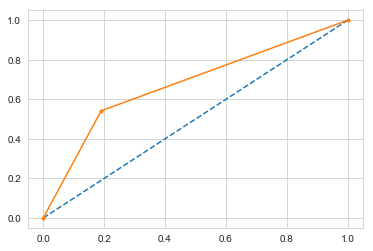

In [80]:
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(false_positive_rate, true_positive_rate, marker='.')
# show the plot
plt.show()

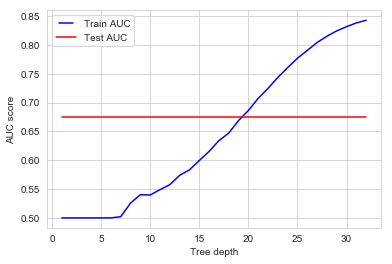

In [81]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, Y_pred_tree)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, color='blue', label='Train AUC')
line2, = plt.plot(max_depths, test_results, color='red', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

## 5.3 Random Forest Classifier

In [82]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
Y_pred_forest = forest.predict(X_test)
print("Treinamento Accuracy Score:", forest.score(X_train, y_train))
print("Teste Accuracy Score:", accuracy_score(y_test,Y_pred_forest))

Treinamento Accuracy Score: 0.9306237994672553
Teste Accuracy Score: 0.8214147374229939


In [83]:
print("F1 score: ",f1_score(y_test, Y_pred_forest))

F1 score:  0.437886227744931


In [84]:
print(confusion_matrix(y_test, Y_pred_forest))

[[141694  11213]
 [ 22443  13109]]


In [85]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, Y_pred_forest)
roc_auc = auc(false_positive_rate, true_positive_rate)
print ("ROC:", roc_auc)

ROC: 0.6476976708012872


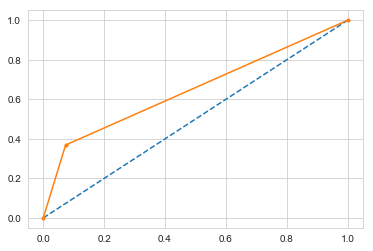

In [86]:
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(false_positive_rate, true_positive_rate, marker='.')
# show the plot
plt.show()

## 5.4 Regressão Logística

In [87]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg',fit_intercept=True)

In [88]:
lr.fit(X_train,y_train)
predictions=lr.predict(X_test)

In [89]:
print("Treinamento Accuracy Score:", lr.score(X_train, y_train))
print("Teste Accuracy Score:", accuracy_score(y_test,predictions))

Treinamento Accuracy Score: 0.8117339141877766
Teste Accuracy Score: 0.8113541937503648


In [90]:
print("F1 score: ",f1_score(y_test, predictions))

F1 score:  0.0


In [91]:
print(confusion_matrix(y_test, predictions))

[[152907      0]
 [ 35552      0]]


In [92]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print ("ROC:", roc_auc)

ROC: 0.5


## 5.5 AdaBoost Classifier

In [93]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=2)
af = ada.fit(X_train, y_train)
af_pred = af.predict(X_test)
print("Treinamento Accuracy Score:", af.score(X_train, y_train))
print("Teste Accuracy Score:", accuracy_score(y_test,af_pred))

Treinamento Accuracy Score: 0.8117339141877766
Teste Accuracy Score: 0.8113541937503648


In [94]:
print("F1 score: ",f1_score(y_test, af_pred))

F1 score:  0.0


In [95]:
print(confusion_matrix(y_test, af_pred))

[[152907      0]
 [ 35552      0]]


In [96]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, af_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print ("ROC:", roc_auc)

ROC: 0.5


## 5.6 Stochastic Gradient Descent Classifier

In [97]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sf = sgd.fit(X_train, y_train)
sf_pred = sf.predict(X_test)
print("Treinamento Accuracy Score:", sf.score(X_train, y_train))
print("Teste Accuracy Score:", accuracy_score(y_test,sf_pred))

Treinamento Accuracy Score: 0.2628092200914793
Teste Accuracy Score: 0.26282639725351403


In [98]:
print("F1 score: ",f1_score(y_test, sf_pred))

F1 score:  0.3232415738273506


In [99]:
print(confusion_matrix(y_test, sf_pred))

[[ 16354 136553]
 [  2374  33178]]


In [100]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, sf_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print ("ROC:", roc_auc)

ROC: 0.5200892362701515


## 5.7 KNeighbors - knn Classifier

In [101]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
Y_pred_Knn=knn.predict(X_test)
print("Treinamento Accuracy Score:", knn.score(X_train, y_train))
print("Teste Accuracy Score:", accuracy_score(y_test,Y_pred_Knn))

Treinamento Accuracy Score: 0.8721983147438687
Teste Accuracy Score: 0.8322818225714878


In [102]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, Y_pred_Knn)
roc_auc = auc(false_positive_rate, true_positive_rate)
print ("ROC:", roc_auc)

ROC: 0.6613026766549303


In [103]:
print(confusion_matrix(y_test, Y_pred_Knn))

[[143102   9805]
 [ 21803  13749]]


In [104]:
print("F1 score: ",f1_score(y_test, Y_pred_Knn))

F1 score:  0.46523195614658414


## 5.8 Naive-Bayes Classifier

In [105]:
model = GaussianNB()

model.fit(X_train,y_train)
GNB = model.predict(X_test)
print("Treinamento Accuracy Score:", model.score(X_train, y_train))
print("Teste Accuracy Score:", accuracy_score(y_test,GNB))

Treinamento Accuracy Score: 0.7500769402201021
Teste Accuracy Score: 0.7504603123225742


In [106]:
print(confusion_matrix(y_test, GNB))

[[132552  20355]
 [ 26673   8879]]


In [108]:
print("F1 score: ",f1_score(y_test, GNB))

F1 score:  0.27410242953724573


In [109]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, GNB)
roc_auc = auc(false_positive_rate, true_positive_rate)
print ("ROC:", roc_auc)

ROC: 0.5583133589200607


##  5.9 Escolhendo o Modelo

### 5.9.1 Verificando Overfitting

In [110]:
from sklearn.model_selection import learning_curve

# It is good to randomize the data before drawing Learning Curves
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2

#X2, y2 = randomize(X, y)

def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()

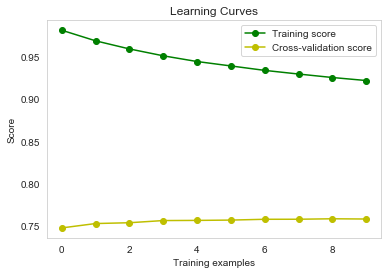

In [111]:
draw_learning_curves(X_train, y_train, decision_tree, 10)

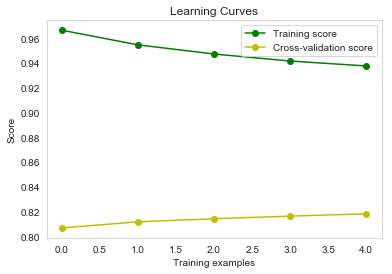

In [112]:
draw_learning_curves(X_train, y_train, forest, 5)

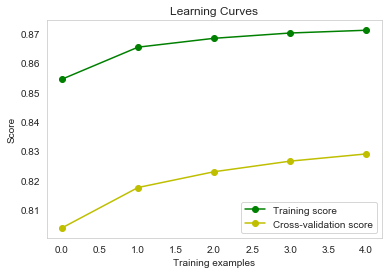

In [113]:
draw_learning_curves(X_train, y_train, knn, 5)

# MACHINE LEARNING - PREDIÇÃO DE EVASÃO

#### INSCRITOS
#### ESFORÇO CURSO
#### CURSO
#### SEXO
#### RENDA
#### FAIXA ETÁRIA
#### COR/RAÇA
#### PERÍODO
#### EIXO
#### PRESENCIAL/EAD
#### TIPO CURSO
#### SEMESTRE OFERECIMENTO
#### CARGA HORÁRIA

In [114]:
dados = [[79,1.3,461,1,5,0,5,0,5,0,11,1,5]]
dados2 = [[40,1.20,418,1,1,4,5,0,5,0,12,0,2]]
dados3 =[[99,1.20,422,0,5,0,5,0,10,0,11,1,5]]

In [115]:
Y_pred_Knn=knn.predict(dados3)
Y_pred_Knn

array([1])

In [116]:
Y_pred_Knn=knn.predict(dados2)
Y_pred_Knn

array([1])

In [117]:
Y_pred_forest = forest.predict(dados3)
Y_pred_forest

array([1])

## 6. Conclusões

#### Os modelos apresentam valores elevados de falso positivo, apesar da precisão do teste estar em torno de 80%.
#### Desta forma iremos utilizar outras técnicas, tais como: dummies; balanceamento de classificação (0 e 1) e utilizar redes neurais (Keras).
#### Analisando estatisticamente os gráfico e este primeiro modelo observamos que há uma grande possibilidade de classificarmos o alunos evadidos com os parâmetros apontados na plataforma Nilo Peçanha da Rede Federal.